# Matematyczny opis modelu

## Równanie opisujące rozchodzenie się temperatury

Aby opisać równanie temperatury potrzebujemy układu równań, który zależy od czasu i przestrzeni. Do modelowania użyjemy zatem modelu reakcji-dyfuzji:
$$u_t(x,t) = D \Delta u(x,t) + f(x,t,u),$$

$$\left[\frac{^\circ K}{s}\right] = \left[\frac{m^2}{s}\right]\left[\frac{^\circ K}{m^2}\right] + \left[\frac{^\circ K}{s}\right]$$
gdzie $x\in\Omega = [0,1]^2$, $t\in (0, T]$ oraz $D=0.1$. Poprzez $f$ oznaczyliśmy siłę zewnętrzną, którą wyrażamy wzorem:
$$f(x,t,u) = \sigma_{temp}\mathbb{I}_{\{x\in R_i\}}(x) \cdot \mathbb{I}_{\{\int_{A_i}u(x,t)dx< t\}}(u),$$
gdzie $A_i$ jest danym pokojem w mieszkaniu.

## Warunki brzegowe

### Okna
Dla okien zastosujemy kryterium Dirichleta, które zakłada, że temperatura na brzegu dziedziny jest znana i jest funkcją czasu:

$$u(x,t) = g(t),$$
gdzie $g(t)$ to temperatura na zewnątrz w chwili $t$. 

Za funkcję $g(t)$ przyjmiemy:
$$g(t) = -2.5 + 4.5 \cdot \sin\left(\frac{2\pi}{T}t\right),$$

gdzie $T = 24\cdot 60 [min]$. Funkcja ta modeluje tempereturę od $-7^\circ C$ do $2^\circ C$ w przeciągu 24 godzin. Jest to średni, dobowy zakres temperatur w Polsce w styczniu.

### Drzwi
Dla drzwi stosujemy kryterium Neumanna, które zakłada stały przepływ ciepła przez brzeg dziedziny. W naszym przypadku jest to po prostu średnia temperatura danych drzwi:

$$u(x,t) = \frac{1}{|D_i|}\int_{D_i} u(x,t) dx, $$

gdzie $D_i$ to dane drzwi. 

### Ściany

Na ścianach zakładamy zerowy przepływ ciepła - stosujemy warunek Neumanna. 

# Schemat numeryczny
Schemat numeryczny naszego równania przedstawia się następująco:
$$u_{i, k+1} = \begin{cases}
    u_{i, j, k} + \frac{D h_t}{h_x^2}\left( u_{i+1, j, k} + u_{i-1, j, k} + u_{i, j+1, k} + u_{i, j-1, k} - 4 u_{i, j, k} \right) + h_t f(x_i, y_i, u_{i, j, k}) & \text{if } x_i ∉ \{0, L, W, V\}.
\end{cases}$$

Pozostałe przypadki rozważyliśmy w powyższej sekcji.


# Zużycie energii

Zużycie energii liczyć będziemy jako $$\int\limits_{0}^T\int\limits_{\text{Mieszkanie}} f(x,t) dxdt$$

# Symulacje
Zasymulujmy 3 sytuacje:
1. Wszystkie grzejniki ustawiamy na poziom 5.
2. Wszystkie grzejniki ustawiamy na poziom 3.
3. Losowo dobieramy poziom grzejników.

Poniżej prezentujemy animacje przedstawiające mapę ciepła dla powyższych sytuacji.

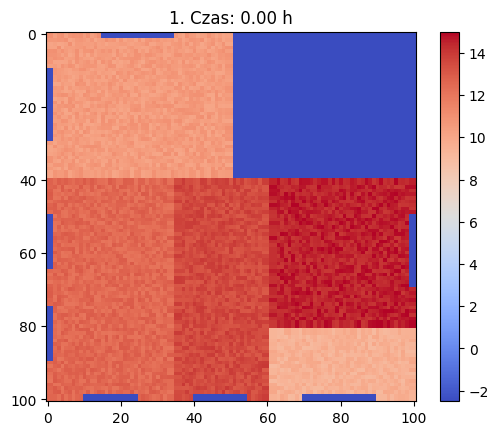

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from house import House
from room import Room
from window import Window
from heater import Heater
from door import Door


rooms = {"I": Room(0, 50, 0, 39, (lambda x: 283 + np.random.random(x.shape))), "II": Room(0, 34, 40, 100,(lambda x: 285 + np.random.random(x.shape))),
            "III": Room(35, 60, 40, 100,(lambda x: 286 + np.random.random(x.shape))),"IV": Room(61, 100, 40, 80,(lambda x: 287 + np.random.random(x.shape))),
            "V": Room(61, 100, 81, 100,(lambda x: 282 + np.random.random(x.shape)))}
windows = [Window(False, 75, 15, 0, "II"), Window(False, 50, 15, 0,"II"), Window(False, 10, 20, 0,"I"), 
            Window(True, 10, 15, 100,"II"), Window(True, 40, 15, 100,"III"), Window(True, 70, 20, 100,"V"),
            Window(False, 50, 20, 100,"IV"), Window(True, 15, 20, 0,"I")]
heaters = [Heater(False, 65, 10, 2,"II",5), Heater(False, 15, 10, 2, "I",5), Heater(False, 45, 15, 58,"III",5,exterior=False),
            Heater(False, 55, 10, 98, "IV",5), Heater(False, 85, 10, 98, "V",5), Heater(True, 20, 10, 98, "II",5), Heater(True, 75, 10, 42, "IV",5), Heater(True, 20, 10, 2, "I",5)]
doors = [Door(True, 15, 10, 39,"I"),Door(True, 15, 10, 40,"II"), Door(False, 65, 10, 34,"II"),Door(False, 65, 10, 35,"III"), Door(False, 65, 10, 60,"III"),Door(False, 65, 10, 61,"IV"), 
            Door(False, 85,10,60,"III"),Door(False, 85,10,61,"V")]
# [left, right, top, bottom] - is interior? T/F
walls = {"I": [False, False, False, True], "II": [False, True, True, False], "III": [True, True, True, False], "IV":[True, False, False, True], "V": [True, False, True, False]} 
params = {"rooms": rooms, "windows": windows,"heaters": heaters, "doors": doors, "walls": walls, "domain": {"grid":np.meshgrid(np.linspace(-1,1,101), np.linspace(-1,1,101))[0]}}
home = House(params)
x,heat1 = home.solution(0.1)
fig, ax = plt.subplots()
title = ax.set_title('1. Czas: 0.00 h')
def update(frame_number):
    heatmap.set_data(x[frame_number])
    title.set_text('1. Czas: {:.2f} h'.format(frame_number / 60))
    return [heatmap]

heatmap = ax.imshow(x[0], cmap='coolwarm', interpolation='nearest')
frames_to_include = range(0, len(x), 20)
colorbar = fig.colorbar(heatmap)
ani = animation.FuncAnimation(fig, update, frames=frames_to_include, blit=True)

# 1

In [17]:
HTML(ani.to_jshtml())

# -----

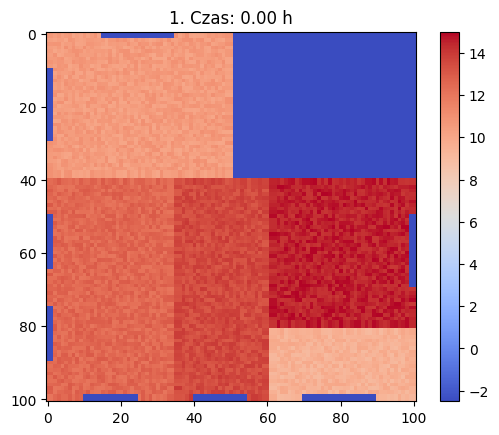

In [18]:
heaters = [Heater(False, 65, 10, 2,"II",3), Heater(False, 15, 10, 2, "I",3), Heater(False, 45, 15, 58,"III",3,exterior=False),
            Heater(False, 55, 10, 98, "IV",3), Heater(False, 85, 10, 98, "V",3), Heater(True, 20, 10, 98, "II",3), Heater(True, 75, 10, 42, "IV",3), Heater(True, 20, 10, 2, "I",3)]
params = {"rooms": rooms, "windows": windows,"heaters": heaters, "doors": doors, "walls": walls}
home = House(params)
x,heat2 = home.solution(0.1)
fig, ax = plt.subplots()
title = ax.set_title('1. Czas: 0.00 h')
def update(frame_number):
    heatmap.set_data(x[frame_number])
    title.set_text('1. Czas: {:.2f} h'.format(frame_number / 60))
    return [heatmap]

heatmap = ax.imshow(x[0], cmap='coolwarm', interpolation='nearest')
frames_to_include = range(0, len(x), 20)
colorbar = fig.colorbar(heatmap)
ani = animation.FuncAnimation(fig, update, frames=frames_to_include, blit=True)


# 2

In [19]:
HTML(ani.to_jshtml())

# -----

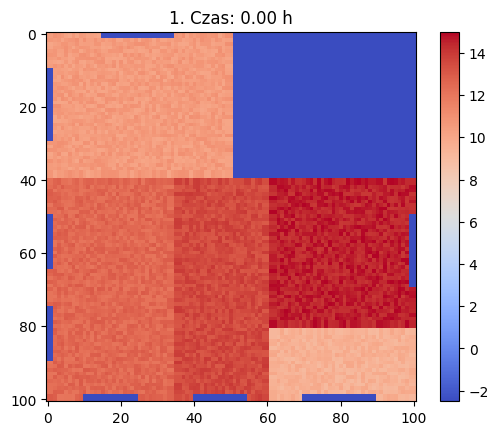

In [20]:
heaters = [Heater(False, 65, 10, 2,"II",1), Heater(False, 15, 10, 2, "I",3), Heater(False, 45, 15, 58,"III",5,exterior=False),
            Heater(False, 55, 10, 98, "IV",2), Heater(False, 85, 10, 98, "V",3), Heater(True, 20, 10, 98, "II",2), Heater(True, 75, 10, 42, "IV",1), Heater(True, 20, 10, 2, "I",5)]
params = {"rooms": rooms, "windows": windows,"heaters": heaters, "doors": doors, "walls": walls}
home = House(params)
x,heat3 = home.solution(0.1)
fig, ax = plt.subplots()
title = ax.set_title('1. Czas: 0.00 h')
def update(frame_number):
    heatmap.set_data(x[frame_number])
    title.set_text('1. Czas: {:.2f} h'.format(frame_number / 60))
    return [heatmap]

heatmap = ax.imshow(x[0], cmap='coolwarm', interpolation='nearest')
frames_to_include = range(0, len(x), 20)
colorbar = fig.colorbar(heatmap)
ani = animation.FuncAnimation(fig, update, frames=frames_to_include, blit=True)

# 3

In [21]:
HTML(ani.to_jshtml())

# Zużycie energii

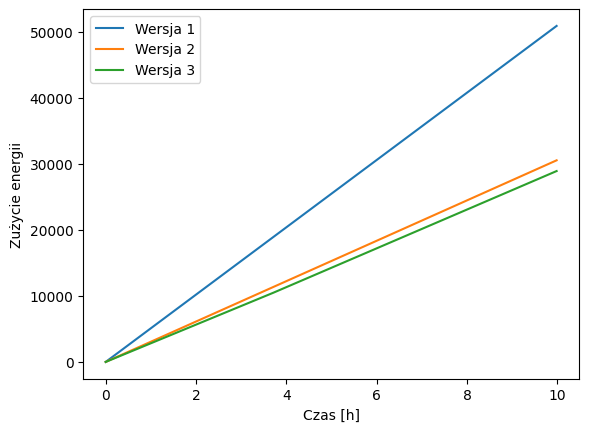

In [26]:
plt.plot((np.arange(0, len(heat1))/60),heat1, label = "Wersja 1")
plt.plot((np.arange(0, len(heat2))/60),heat2, label = "Wersja 2")
plt.plot((np.arange(0, len(heat3))/60),heat3, label = "Wersja 3")
plt.ylabel("Zużycie energii")
plt.xlabel("Czas [h]")
plt.legend()
plt.show()